# Hydrabad House Price Prediction from Kaggle

In this write up I will explain the Exploratory Data Analysis, Data Cleaning and Visualization of Hydrabad Housing Price Prediction from Kaggle.

You can find the copy of this notebook with more details in my github here:____


# Data Summary

First let us import the necessary libraries used in this notebook.

In [4]:
import numpy as np
import pandas as pd 

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

#statistics
from scipy import stats
from scipy.stats import norm, skew 

Lets read the train and test data.

In [5]:
train = pd.read_csv('../data/train-hpp.csv')
test = pd.read_csv('../data/test-hpp.csv')

In [38]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,12.072547
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,12.254868
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,12.493133
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,11.864469


In [39]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


There are 81 columns in the dataset. But we do not know the number of rows. Lets get it first.

In [8]:
train.shape, test.shape

((1460, 81), (1459, 80))

So there are 1460 items in train dataset and 1459 items in the test dataset. Obviously the train data has one more column for the target variable 'SalePrice'.

Lets drop the Id column from both train and test data since we are not going to feed this to our model.

In [9]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

Now lets check the column of the data to have a picture of what we have in hand.

In [10]:
train.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

There are too many variables in this dataset. 

# Target Variable Analysis

The first thing we see when we are buying a house is the Living Area. So lets anlayse the Living area with our target variable SalePrice first.

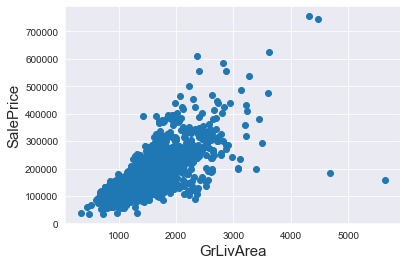

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

From the above plot, the Living area and Sale Price has a linear relationship.

The two dots on the top shows the sudden increase in price. It may be because of the house located in the hot spot of the city.

Also note the two dots on the right side where the GrLivingArea is more and the SalePrice is very less. It could be the agricultural land nearby the city. But if you analyse the data carefully, these two points doesnt fit in here. These are called Outliers. If we feed these data to our model, definitely the model will not perform well. And hence we should carefully delete these outliers before modeling.

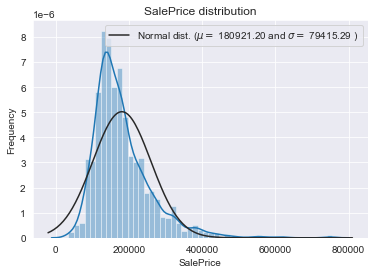

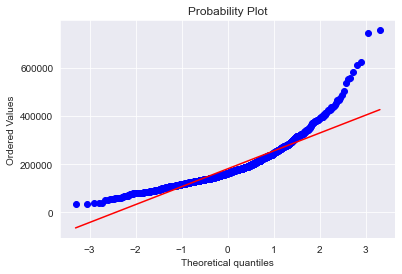

In [12]:
sns.distplot(train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

As we can see in the graph, the data is not normally distributed. The linear regression model we use needs the data to be normally distributed. Hence we need to transform the variable to normal distribution.

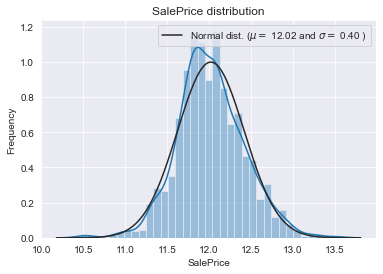

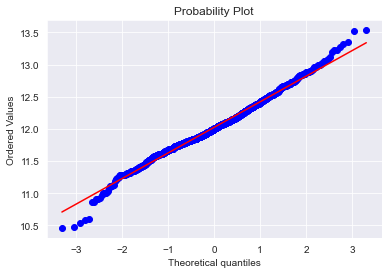

In [13]:
train["SalePrice"] = np.log1p(train["SalePrice"])
 
sns.distplot(train['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(train['SalePrice'])
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

We have just done log transformation to the 'SalePrice' variable.

Before moving further into data cleaning and modeling, lets combine the test and train data so that we do not need to clean the data twice.

In [14]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2919, 79)


# Null and Missing Values Study

First lets find the missing values in the dataset.

In [15]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(15)

,Missing Ratio
PoolQC,99.657417
MiscFeature,96.402878
Alley,93.216855
Fence,80.438506
FireplaceQu,48.646797
LotFrontage,16.649538
GarageFinish,5.447071
GarageYrBlt,5.447071
GarageQual,5.447071
GarageCond,5.447071


Lets look at the top five rows of the data which has more missing values. The PoolQC, MiscFeature, Alley, Fence and FireplaceQu. All these data seems unwated in predicting the house prices. But we are not going to drop them. Lets just fill the missing values with 0 or None and proceed with modeling.

Now lets plot the missing values.

In [41]:
y_train.shape

(1460,)

Text(0.5, 1.0, 'Percent missing data by feature')

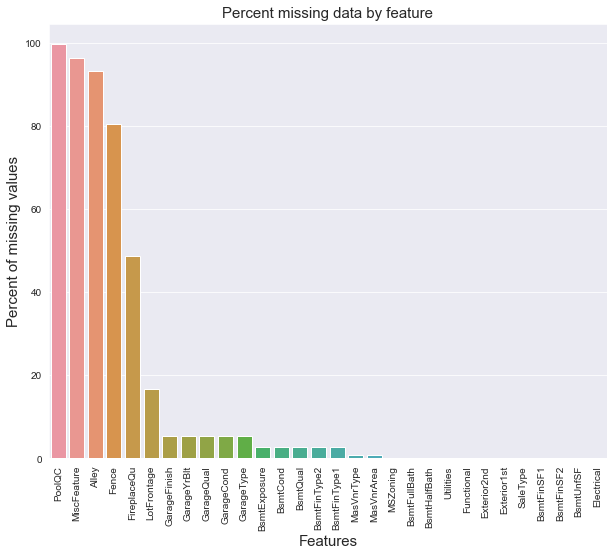

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

# Data Cleaning

Lets clean the missing values of the top five by filling the empty values with "None".

In [17]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

Next is LotFrontage. The dtype of LotFrontage is float. Hence we cannot fill None for missing values. In general the LotFrontage of a house is mostly equal to the Neighborhood houses. Hence we group the data by "Neighborhood" and fill the missing values with median value of the neighborhood houses.

In [18]:
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

Now filling the missing values in 'GarageType', 'GarageFinish', 'GarageQual' and 'GarageCond' with "None"

In [19]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

The dtype of the 'GarageYrBlt', 'GarageArea' and 'GarageCars' are integer. Hence we are filling the missing values with 0.

In [20]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

Now lets see the variables related to Basement. The dtype of 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath' and 'BsmtHalfBath' are all float. Hence we fill the missing values with 0.

In [21]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

The other variables related to Basement are 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1' and 'BsmtFinType2' which are categorical. Lets fill the missing values with "None"

In [22]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

Next we take the Type and Area masonry veneer. Lets fill 0 for missing value in area and "None" for missing value in type.

In [23]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

Now lets fill the missing values of the MSZoning with the most common value.

In [24]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

If we look at the 'Utilities' column, almost all the column has the same value "AllPub", which means this variable is not going to help in prediction. Hence we drop this column.

In [25]:
all_data = all_data.drop(['Utilities'], axis=1)

Lets fill the NA values of "Functional" column with Typical.

In [26]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")


Now we fill the missing values in 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd' and 'SaleType' with the most frequent value.

In [27]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

Finally we fill the missing value in 'MSSubClass' with "None"

In [28]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

Now lets check whether there are any more missing value present in the dataset.

In [29]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


Done! There are no missing values present in the dataset.

Now we change datatype of some objects to str.

In [42]:
y_train.shape

(1460,)

In [30]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

all_data['OverallCond'] = all_data['OverallCond'].astype(str)

all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

Since "Area" plays important role in predicting the price, lets create a new column that contains the total area of the house including basement, first floor and second floor.

In [31]:
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

Now we slplit the clean data from all data and store it in a new df along with SalePrice

In [49]:
df.shape

(1460, 79)

In [50]:
y_train.shape

(1460,)

In [43]:
y_train.shape

(1460,)

In [53]:
y_train = pd.read_csv('../data/train-hpp.csv')['SalePrice']

In [55]:
y_train.shape

(1460,)

In [56]:
#clean df
df = all_data[:ntrain]
#df['SalePrice'] = y_train
df.to_csv('../data/clean_train-hpp.csv', index=False)
y_train.to_csv('../data/clean_y_train-hpp.csv', index=False)

In [58]:
df.shape, y_train.shape

((1460, 79), (1460,))

Thats all about data cleaning. 

# Correlation Study

We have 80 columns in our data set. Visualizing all the data takes a lot of time. We just try to analyse the variables which are highly correlated (both positive and negative) with our target variable "SalePrice".

In [34]:
corrmat = train.corr()

def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    for i , index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df2 = pd.DataFrame(data = value, index=feature, columns=['corr value'] )
    return df2

corr_df = getCorrelatedFeature(corrmat['SalePrice'], 0.5)
corr_df

,corr value
OverallQual,0.817185
YearBuilt,0.586570
YearRemodAdd,0.565608
TotalBsmtSF,0.612134
1stFlrSF,0.596981
GrLivArea,0.700927
FullBath,0.594771
TotRmsAbvGrd,0.534422
GarageYrBlt,0.541073
GarageCars,0.680625


We just got all the variables which are highly correlated with our target variable. Now lets look at the values of the correlated data.

In [35]:
correlated_data = df[corr_df.index]
correlated_data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856.0,856,1710,2,8,2003.0,2.0,548.0,12.247699
1,6,1976,1976,1262.0,1262,1262,2,6,1976.0,2.0,460.0,12.109016
2,7,2001,2002,920.0,920,1786,2,6,2001.0,2.0,608.0,12.317171
3,7,1915,1970,756.0,961,1717,1,7,1998.0,3.0,642.0,11.849405
4,8,2000,2000,1145.0,1145,2198,2,9,2000.0,3.0,836.0,12.429220


Lets look at the heatmap of the correlated data for a better picture.

<AxesSubplot:>

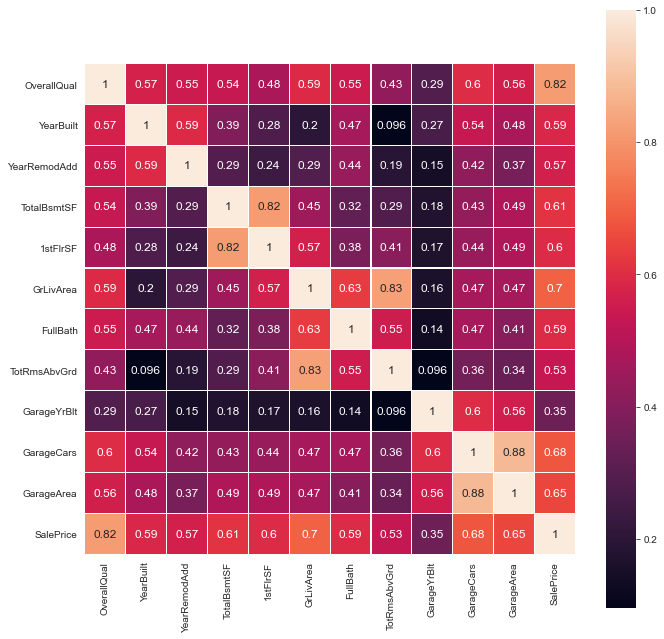

In [36]:
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(correlated_data.corr(), annot = True, annot_kws={'size': 12}, square=True, linecolor='w', linewidths=0.1)

From the above heatmap, GrageArea seems highly correlated with our target variable.

# Bivariate Analysis

Since GarageArea is highly correated with traget variable, lets analyse it first.

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

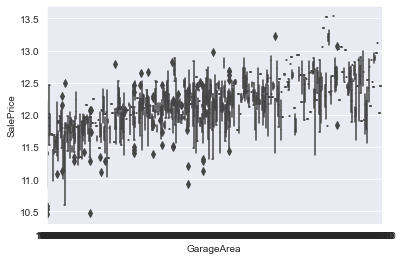

In [37]:
sns.boxplot(y='SalePrice', x = 'GarageArea', data=df)

We can see a trend in data. The above plot clearly shows a linear relationship betweeb SalePrice and GarageArea. The SalePrice increases when the GarageArea increase.

Now lets analyse the next variable OverallQual since it is highly correlated with our target variable.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

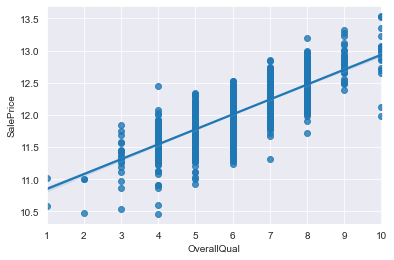

In [38]:
sns.regplot(x='OverallQual', y='SalePrice', data=df, robust=True)

Obviously there is a linear relationship between OverallQual and SalePrice. 

Now we analyse YearBuilt along with SalePrice.

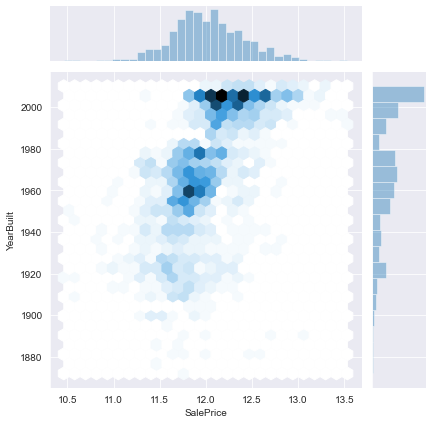

In [39]:
sns.jointplot(x='SalePrice', y='YearBuilt', data=df, kind='hexx')

Here also we can clearly see a linear trend.

Next we analyse TotalBsmtSF.

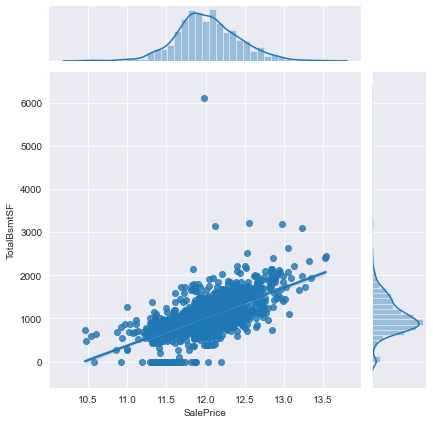

In [40]:
sns.jointplot(x='SalePrice', y='TotalBsmtSF', data=df, kind='reg')

TotalBsmtSF is very highly correlated with our target variable SalePrice and also it follows a linear trend.

Next we analyse GarageYrBlt.

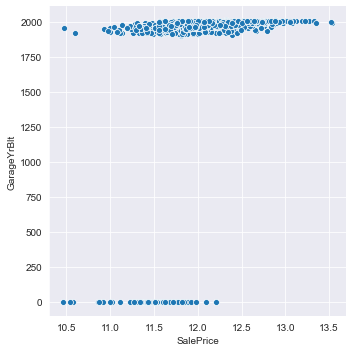

In [41]:
sns.relplot(x='SalePrice', y='GarageYrBlt', data=df)

As you can see in the above plot GarageYrBlt is also highly negatively correlated with target variable and hence we couldnt see any trend in the data.

Next we analyse GrLivArea with SalePrice.

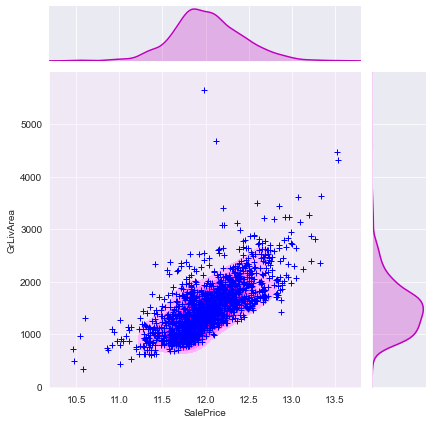

In [42]:
g = sns.jointplot(x='SalePrice', y='GrLivArea', data=df, kind='kde', color='m')
g.plot_joint(plt.scatter, color='b', s=40, linewidth=1, marker='+' )
g.ax_joint.collections[0].set_alpha(0.3)

Here also we can see the linear trend in data. When the GrLivArea increases, the SalePrice increases.

Now lets analyse TotRmsAbvGrd with SalePrice.

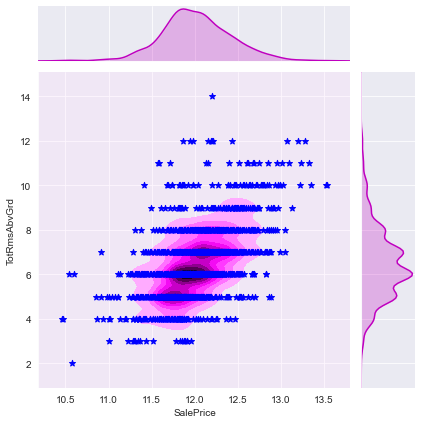

In [43]:
g = sns.jointplot(x='SalePrice', y='TotRmsAbvGrd', data=df, kind='kde', color='m')
g.plot_joint(plt.scatter, color='b', s=40, linewidth=1, marker='*' )
g.ax_joint.collections[0].set_alpha(0.3)

From the above plot, we could see a slight linear trend.

Next we analyse our next variable 'YearRemodAdd'.

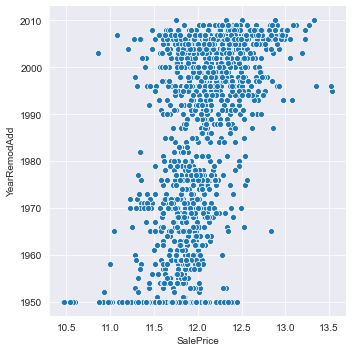

In [44]:
sns.relplot(x='SalePrice', y='YearRemodAdd', data=df)

If you see the above plot, the YearRemodAdd also has a linear relationship with SalePrice.

Now we analyse the next variable 'FullBath'

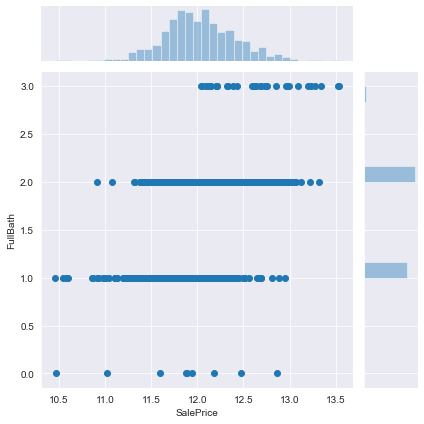

In [45]:
sns.jointplot(x='SalePrice', y='FullBath', data=df)

If you see here, there is no trend in data. It is highly negatively correlated with our target variable. But this helps the model to predict better.

# Multivariate Analysis

We have already analysed OverallQual with SalePrice. Now lets include the third variable GarageCars and see if there is any change in trend in the data.

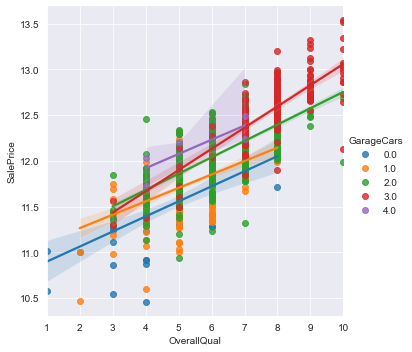

In [46]:
sns.lmplot(x='OverallQual', y='SalePrice', data=df, hue= 'GarageCars')

We can see a linear trend in the data. Lets print the plots seperately to have a better picture of the data.

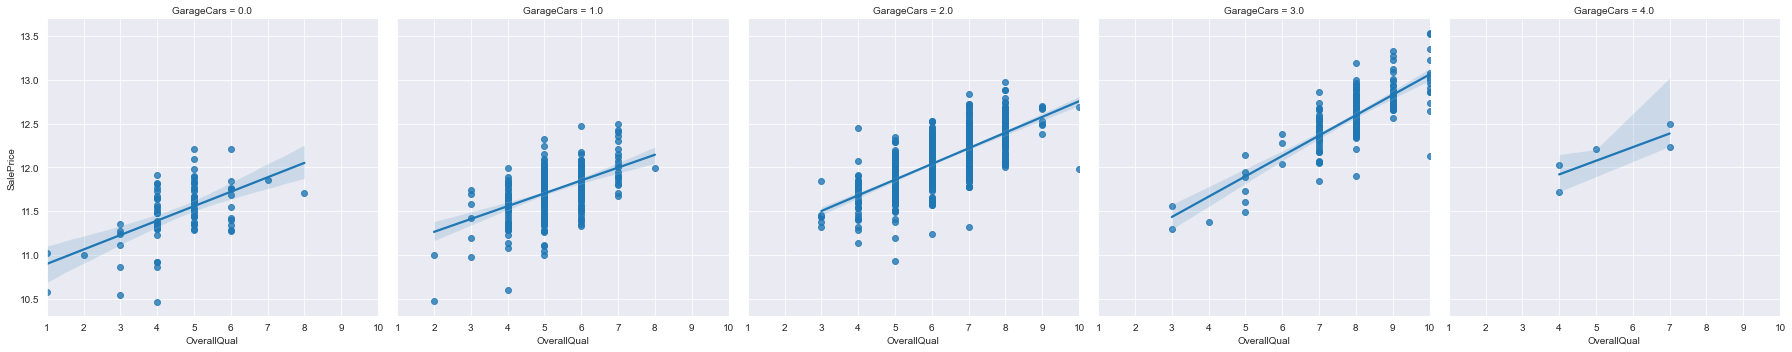

In [47]:
sns.lmplot(x='OverallQual', y='SalePrice', data=df, col= 'GarageCars')

Thats all about this write up. I will explain modeling and evaluation in my next writeup.